# Insurance Data - Comprehensive Exploratory Data Analysis (EDA)

Welcome to an in-depth exploration of insurance data!  
This notebook guides you through a rich analytical journey—assessing data quality, uncovering descriptive statistics, visualizing distributions, and revealing key business insights through advanced analytics and interactive visualizations.

Whether you're seeking to understand risk, optimize pricing, or discover actionable trends, this EDA provides a robust foundation for data-driven decision making in the insurance domain.

## Table of Contents
1. [Setup and Data Loading](#setup)
2. [Data Quality Assessment](#quality)
3. [Descriptive Statistics](#descriptive)
4. [Univariate Analysis](#univariate)
5. [Bivariate Analysis](#bivariate)
6. [Advanced Visualizations](#advanced)
7. [Outlier Detection](#outliers)
8. [Key Findings and Insights](#findings)

## 1. Setup and Data Loading {#setup}

First, let's import all necessary libraries and load our processed insurance data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configure display settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 20)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the processed insurance data
df = pd.read_csv('../data/processed/insurance_data.csv')

print(f"Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Data loaded successfully!
Dataset shape: (1000098, 52)
Memory usage: 2110.59 MB


In [3]:
# Display first few rows and basic info
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
df.info()

First 5 rows of the dataset:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Winds...,Windscreen,Windscreen,Comprehensive - ...,Motor Comprehensive,Mobility Metered...,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Winds...,Windscreen,Windscreen,Comprehensive - ...,Motor Comprehensive,Mobility Metered...,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Winds...,Windscreen,Windscreen,Comprehensive - ...,Motor Comprehensive,Mobility Metered...,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Meter...,Own damage,Own Damage,Comprehensive - ...,Motor Comprehensive,Mobility Metered...,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Meter...,Own damage,Own Damage,Comprehensive - ...,Motor Comprehensive,Mobility Metered...,Commercial,IFRS Constant,0.000000,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province    

## 2. Data Quality Assessment {#quality}

Let's assess the quality of our data by examining missing values, data types, and basic statistics.

In [4]:
def assess_data_quality(df):
    """Comprehensive data quality assessment"""
    
    # Missing values analysis
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing Count': missing_data.values,
        'Missing Percentage': missing_percent.values
    }).sort_values('Missing Percentage', ascending=False)
    
    return missing_df

# Assess data quality
missing_summary = assess_data_quality(df)

print("Missing Values Summary:")
display(missing_summary[missing_summary['Missing Percentage'] > 0].head(10))

Missing Values Summary:


,Column,Missing Count,Missing Percentage
38,NumberOfVehicles...,1000098,100.000000
37,CrossBorder,999400,99.930207
29,CustomValueEstimate,779642,77.956560
35,Rebuilt,641901,64.183810
36,Converted,641901,64.183810
34,WrittenOff,641901,64.183810
33,NewVehicle,153295,15.327998
8,Bank,145961,14.594670
9,AccountType,40232,4.022806
11,Gender,9536,0.953507


In [5]:
# Data types summary
print("Data Types Summary:")
dtype_summary = df.dtypes.value_counts().to_frame('Count')
dtype_summary.index.name = 'Data Type'
display(dtype_summary)

print(f"\nNumeric columns: {df.select_dtypes(include=[np.number]).columns.tolist()}")
print(f"Categorical columns: {df.select_dtypes(include=['object']).columns.tolist()}")

Data Types Summary:


,Count
Data Type,
object,36
float64,11
int64,4
bool,1



Numeric columns: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Categorical columns: ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


## 3. Descriptive Statistics {#descriptive}

Now let's examine the descriptive statistics for our numerical variables and key business metrics.

In [6]:
# Numeric columns summary
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Descriptive Statistics for Numeric Columns ({len(numeric_cols)} columns):")
display(df[numeric_cols].describe())

Descriptive Statistics for Numeric Columns (15 columns):


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [7]:
# Calculate key financial metrics
if 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    # Calculate Loss Ratio
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)
    
    print("Key Financial Metrics:")
    print(f"Total Premium Sum: ${df['TotalPremium'].sum():,.2f}")
    print(f"Total Claims Sum: ${df['TotalClaims'].sum():,.2f}")
    print(f"Overall Loss Ratio: {df['TotalClaims'].sum() / df['TotalPremium'].sum():.3f}")
    print(f"Average Loss Ratio: {df['LossRatio'].mean():.3f}")
    print(f"Median Loss Ratio: {df['LossRatio'].median():.3f}")
    
    # Loss ratio statistics
    print("\nLoss Ratio Distribution:")
    display(df['LossRatio'].describe())

Key Financial Metrics:
Total Premium Sum: $61,911,562.70
Total Claims Sum: $64,867,546.17
Overall Loss Ratio: 1.048
Average Loss Ratio: 0.350
Median Loss Ratio: 0.000

Loss Ratio Distribution:


count    618464.000000
mean          0.349885
std           9.286479
min         -18.700122
25%           0.000000
50%           0.000000
75%           0.000000
max        2553.600000
Name: LossRatio, dtype: float64

## 4. Univariate Analysis {#univariate}

Let's explore the distribution of individual variables, starting with numerical variables.

### 4.1 Numerical Variables Distribution

Distribution of Key Numerical Variables:


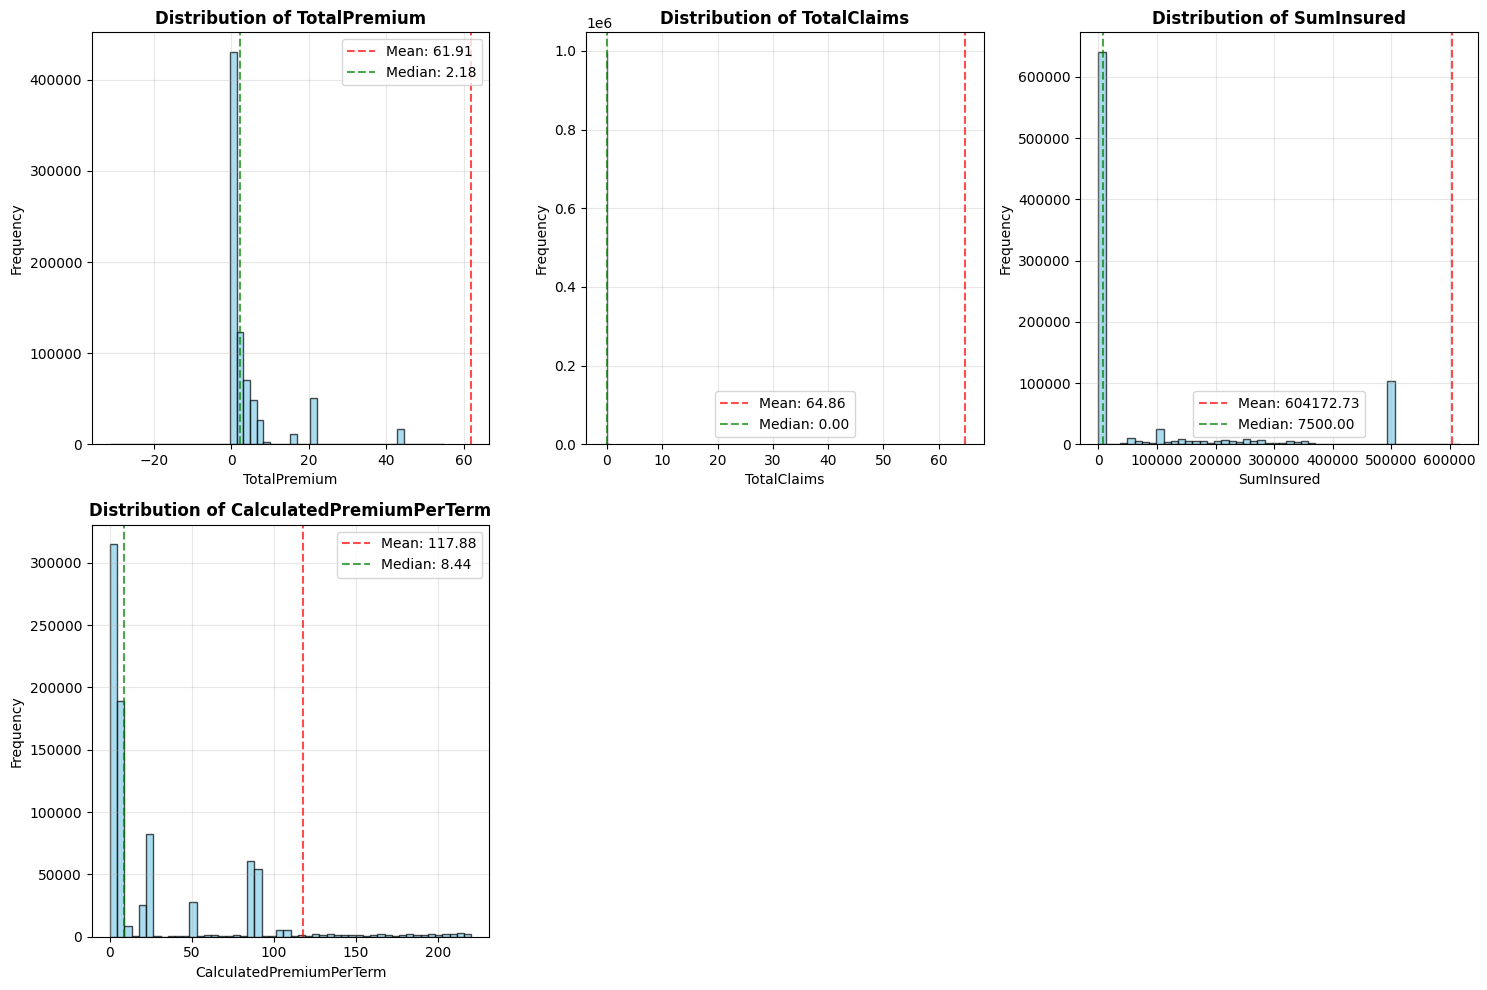

In [8]:
def plot_numerical_distributions(df, columns, ncols=3):
    """Plot distributions for numerical columns"""
    n_rows = (len(columns) + ncols - 1) // ncols
    
    fig, axes = plt.subplots(n_rows, ncols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if ncols == 1 else axes
    else:
        axes = axes.ravel()
    
    for i, col in enumerate(columns):
        if i < len(axes) and col in df.columns:
            # Remove outliers for better visualization
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]
            
            axes[i].hist(filtered_data.dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
            
            # Add statistics text
            mean_val = df[col].mean()
            median_val = df[col].median()
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
            axes[i].legend()
    
    # Remove empty subplots
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Plot key numerical distributions
key_numeric_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
available_cols = [col for col in key_numeric_cols if col in df.columns]

if available_cols:
    print("Distribution of Key Numerical Variables:")
    plot_numerical_distributions(df, available_cols)
else:
    print("Key numerical columns not found in dataset")

### 4.2 Categorical Variables Distribution

Distribution of Key Categorical Variables:


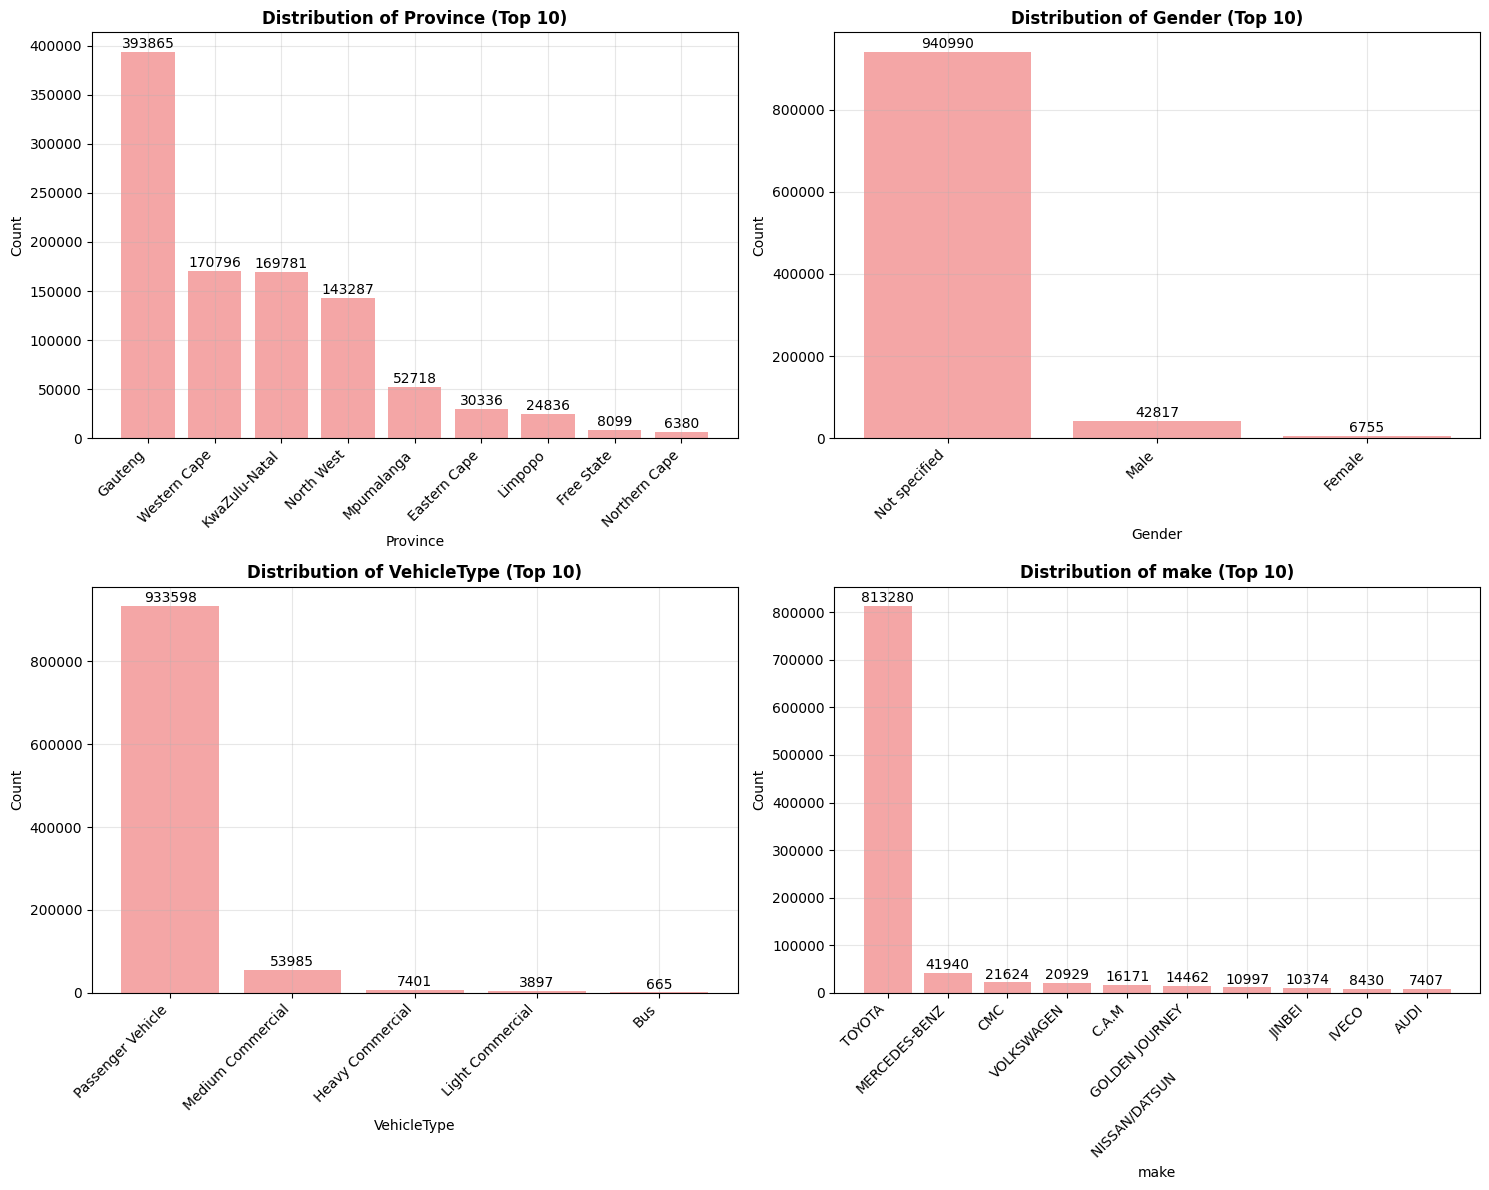

In [9]:
def plot_categorical_distributions(df, columns, ncols=2):
    """Plot distributions for categorical columns"""
    n_rows = (len(columns) + ncols - 1) // ncols
    
    fig, axes = plt.subplots(n_rows, ncols, figsize=(15, 6*n_rows))
    if n_rows == 1:
        axes = [axes] if ncols == 1 else axes
    else:
        axes = axes.ravel()
    
    for i, col in enumerate(columns):
        if i < len(axes) and col in df.columns:
            # Get top 10 categories to avoid overcrowding
            top_categories = df[col].value_counts().head(10)
            
            axes[i].bar(range(len(top_categories)), top_categories.values, color='lightcoral', alpha=0.7)
            axes[i].set_title(f'Distribution of {col} (Top 10)', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].set_xticks(range(len(top_categories)))
            axes[i].set_xticklabels(top_categories.index, rotation=45, ha='right')
            axes[i].grid(True, alpha=0.3)
            
            # Add value labels on bars
            for j, v in enumerate(top_categories.values):
                axes[i].text(j, v + max(top_categories.values) * 0.01, str(v), ha='center')
    
    # Remove empty subplots
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

# Plot key categorical distributions
key_categorical_cols = ['Province', 'Gender', 'VehicleType', 'make']
available_cat_cols = [col for col in key_categorical_cols if col in df.columns]

if available_cat_cols:
    print("Distribution of Key Categorical Variables:")
    plot_categorical_distributions(df, available_cat_cols)
else:
    print("Key categorical columns not found in dataset")

## 5. Bivariate Analysis {#bivariate}

Now let's explore relationships between variables, particularly focusing on loss ratios across different segments.

### 5.1 Loss Ratio Analysis by Business Segments

Loss Ratio Analysis by Business Segments:


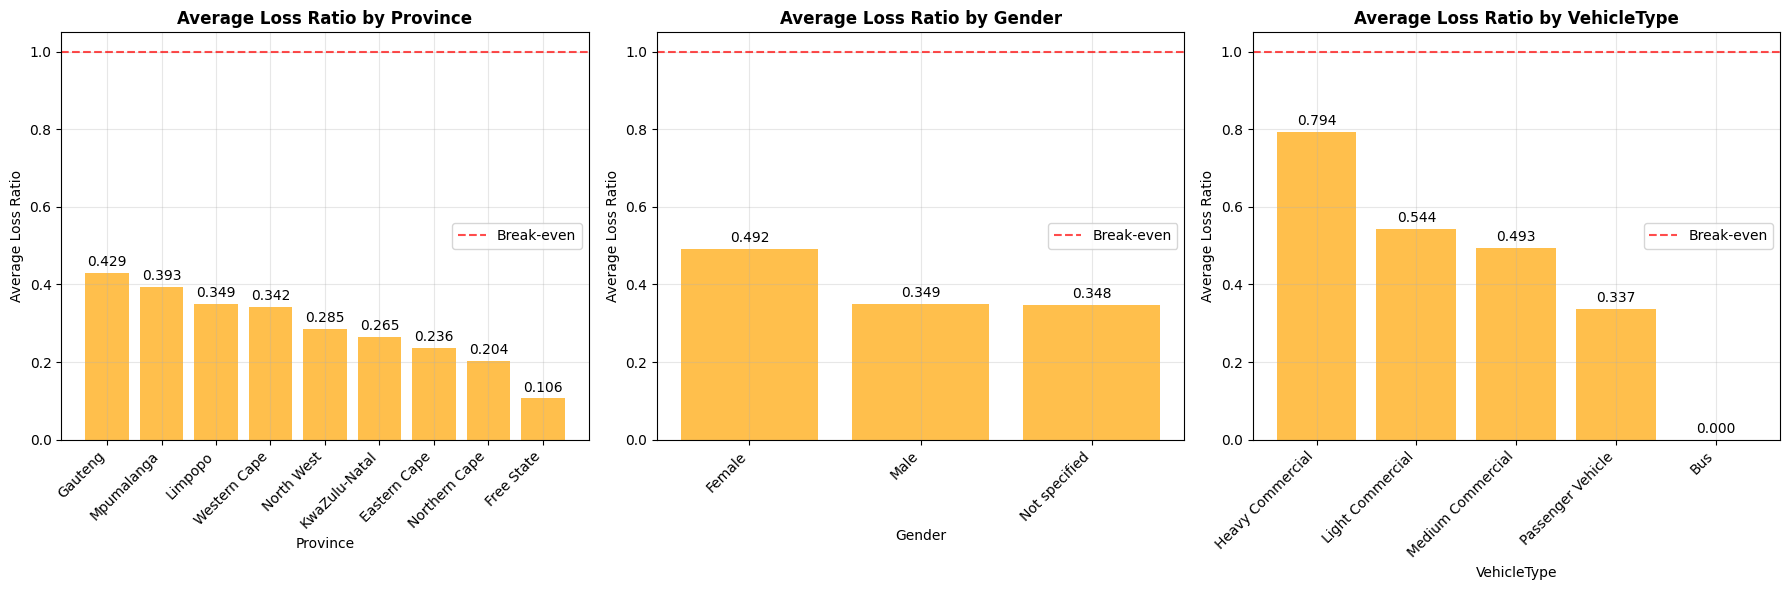

In [10]:
def analyze_loss_ratio_by_segments(df):
    """Analyze loss ratio across different segments"""
    if 'LossRatio' not in df.columns:
        if 'TotalClaims' in df.columns and 'TotalPremium' in df.columns:
            df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
            df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)
        else:
            print("Cannot calculate loss ratio: TotalClaims or TotalPremium columns missing")
            return
    
    segments = ['Province', 'Gender', 'VehicleType']
    available_segments = [seg for seg in segments if seg in df.columns]
    
    if not available_segments:
        print("No segment columns available for analysis")
        return
    
    fig, axes = plt.subplots(1, len(available_segments), figsize=(6*len(available_segments), 6))
    if len(available_segments) == 1:
        axes = [axes]
    
    for i, segment in enumerate(available_segments):
        # Calculate loss ratio by segment
        segment_analysis = df.groupby(segment).agg({
            'LossRatio': 'mean',
            'PolicyID': 'count',
            'TotalPremium': 'sum',
            'TotalClaims': 'sum'
        }).reset_index()
        
        # Filter segments with sufficient data
        segment_analysis = segment_analysis[segment_analysis['PolicyID'] >= 100]
        segment_analysis = segment_analysis.sort_values('LossRatio', ascending=False).head(10)
        
        if len(segment_analysis) > 0:
            bars = axes[i].bar(range(len(segment_analysis)), segment_analysis['LossRatio'], 
                             color='orange', alpha=0.7)
            axes[i].set_title(f'Average Loss Ratio by {segment}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(segment)
            axes[i].set_ylabel('Average Loss Ratio')
            axes[i].set_xticks(range(len(segment_analysis)))
            axes[i].set_xticklabels(segment_analysis[segment], rotation=45, ha='right')
            axes[i].grid(True, alpha=0.3)
            axes[i].axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Break-even')
            axes[i].legend()
            
            # Add value labels on bars
            for bar, value in zip(bars, segment_analysis['LossRatio']):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{value:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze loss ratios
print("Loss Ratio Analysis by Business Segments:")
analyze_loss_ratio_by_segments(df)

### 5.2 Correlation Analysis

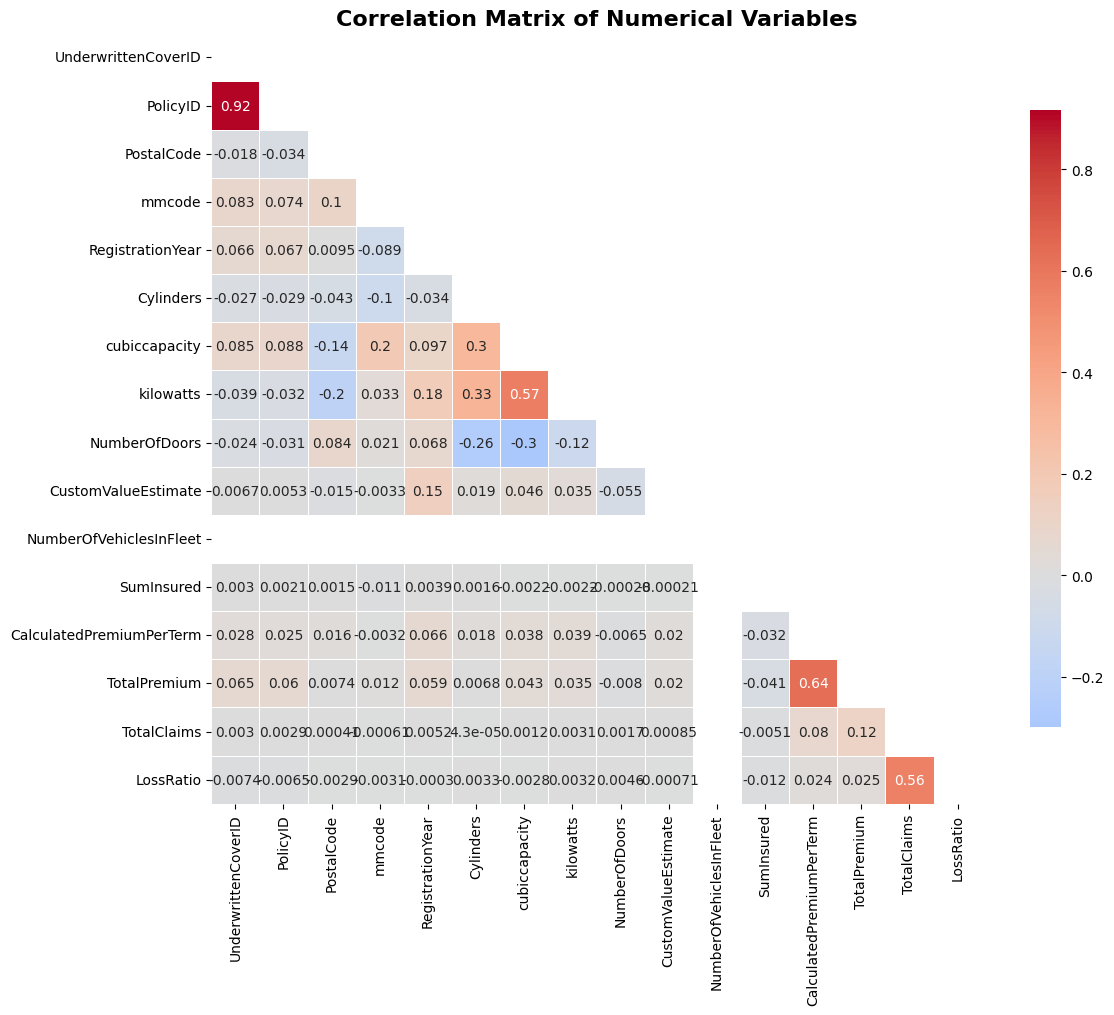

Strongest Positive Correlations (> 0.5):
PolicyID vs UnderwrittenCoverID: 0.916
UnderwrittenCoverID vs PolicyID: 0.916
CalculatedPremiumPerTerm vs TotalPremium: 0.636
TotalPremium vs CalculatedPremiumPerTerm: 0.636
cubiccapacity vs kilowatts: 0.567
kilowatts vs cubiccapacity: 0.567
LossRatio vs TotalClaims: 0.561
TotalClaims vs LossRatio: 0.561


In [11]:
# Correlation matrix for numerical variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Display strongest correlations
print("Strongest Positive Correlations (> 0.5):")
strong_corr = correlation_matrix.unstack().sort_values(ascending=False)
strong_corr = strong_corr[strong_corr < 1.0]  # Remove self-correlations
strong_positive = strong_corr[strong_corr > 0.5].head(10)
for pair, corr in strong_positive.items():
    print(f"{pair[0]} vs {pair[1]}: {corr:.3f}")

## 6. Advanced Visualizations {#advanced}

Let's create some advanced, interactive visualizations to gain deeper insights into our data.

### 6.1 Premium vs Claims Scatter Analysis

In [12]:
# Premium vs Claims Scatter with Loss Ratio Color
if all(col in df.columns for col in ['TotalPremium', 'TotalClaims', 'LossRatio']):
    # Sample data for better performance
    sample_size = min(10000, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    # Remove extreme outliers for better visualization
    sample_df = sample_df[
        (sample_df['TotalPremium'] <= sample_df['TotalPremium'].quantile(0.95)) &
        (sample_df['TotalClaims'] <= sample_df['TotalClaims'].quantile(0.95)) &
        (sample_df['LossRatio'] <= 5)  # Cap loss ratio at 5 for visualization
    ]
    
    hover_cols = [col for col in ['Province', 'VehicleType', 'Gender'] if col in df.columns]
    
    fig = px.scatter(
        sample_df, 
        x='TotalPremium', 
        y='TotalClaims',
        color='LossRatio',
        size='SumInsured' if 'SumInsured' in df.columns else None,
        hover_data=hover_cols,
        title=f'Premium vs Claims Analysis (Sample of {len(sample_df):,} policies)',
        color_continuous_scale='RdYlBu_r',
        labels={
            'TotalPremium': 'Total Premium ($)',
            'TotalClaims': 'Total Claims ($)',
            'LossRatio': 'Loss Ratio'
        }
    )
    
    # Add break-even line
    max_val = max(sample_df['TotalPremium'].max(), sample_df['TotalClaims'].max())
    fig.add_shape(
        type="line",
        x0=0, y0=0, x1=max_val, y1=max_val,
        line=dict(color="red", width=2, dash="dash"),
    )
    
    fig.update_layout(height=600, showlegend=True)
    fig.show()
else:
    print("Required columns for scatter plot not available")

### 6.2 Time Series Analysis

In [13]:
# Time Series Analysis
if 'TransactionMonth' in df.columns:
    # Convert to datetime if not already
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
    
    # Filter out invalid dates
    df_time = df.dropna(subset=['TransactionMonth'])
    
    if len(df_time) > 0:
        monthly_trends = df_time.groupby(df_time['TransactionMonth'].dt.to_period('M')).agg({
            'TotalPremium': 'sum',
            'TotalClaims': 'sum',
            'PolicyID': 'count'
        }).reset_index()
        
        monthly_trends['LossRatio'] = monthly_trends['TotalClaims'] / monthly_trends['TotalPremium']
        monthly_trends['TransactionMonth'] = monthly_trends['TransactionMonth'].astype(str)
        
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Monthly Premium Revenue', 'Monthly Claims Payout', 
                          'Monthly Policy Count', 'Monthly Loss Ratio'),
            specs=[[{"secondary_y": False}, {"secondary_y": False}],
                   [{"secondary_y": False}, {"secondary_y": False}]]
        )
        
        # Premium trend
        fig.add_trace(
            go.Scatter(x=monthly_trends['TransactionMonth'], y=monthly_trends['TotalPremium'],
                      name='Premium', line=dict(color='blue', width=3)),
            row=1, col=1
        )
        
        # Claims trend
        fig.add_trace(
            go.Scatter(x=monthly_trends['TransactionMonth'], y=monthly_trends['TotalClaims'],
                      name='Claims', line=dict(color='red', width=3)),
            row=1, col=2
        )
        
        # Policy count trend
        fig.add_trace(
            go.Scatter(x=monthly_trends['TransactionMonth'], y=monthly_trends['PolicyID'],
                      name='Policy Count', line=dict(color='green', width=3)),
            row=2, col=1
        )
        
        # Loss ratio trend
        fig.add_trace(
            go.Scatter(x=monthly_trends['TransactionMonth'], y=monthly_trends['LossRatio'],
                      name='Loss Ratio', line=dict(color='orange', width=3)),
            row=2, col=2
        )
        
        # Add break-even line to loss ratio
        fig.add_hline(y=1.0, line_dash="dash", line_color="red", 
                     annotation_text="Break-even", row=2, col=2)
        
        fig.update_layout(height=600, title_text="Insurance Business Trends Over Time", 
                         showlegend=False)
        fig.update_xaxes(tickangle=45)
        fig.show()
    else:
        print("No valid transaction dates found")
else:
    print("TransactionMonth column not available for time series analysis")

### 6.3 Risk Heatmap by Province and Vehicle Type

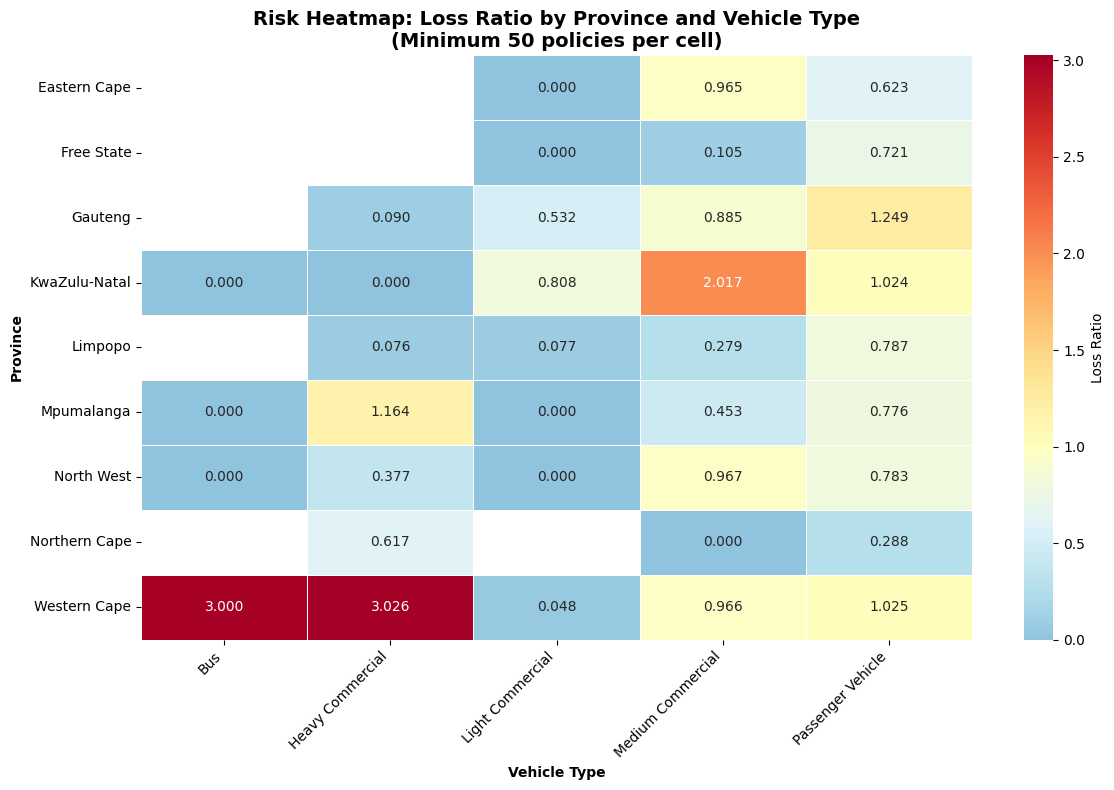

Risk Heatmap Summary:
Total combinations analyzed: 38
Highest risk (Loss Ratio): 3.026
Lowest risk (Loss Ratio): 0.000


In [14]:
# Risk Heatmap by Province and Vehicle Type
if all(col in df.columns for col in ['Province', 'VehicleType', 'TotalClaims', 'TotalPremium']):
    # Create risk matrix
    risk_matrix = df.groupby(['Province', 'VehicleType']).agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum',
        'PolicyID': 'count'
    }).reset_index()
    
    risk_matrix['LossRatio'] = risk_matrix['TotalClaims'] / risk_matrix['TotalPremium']
    
    # Filter for statistical significance (at least 50 policies)
    risk_matrix = risk_matrix[risk_matrix['PolicyID'] >= 50]
    
    if len(risk_matrix) > 0:
        # Pivot for heatmap
        heatmap_data = risk_matrix.pivot(index='Province', columns='VehicleType', values='LossRatio')
        
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, annot=True, cmap='RdYlBu_r', center=1.0, fmt='.3f',
                   linewidths=0.5, cbar_kws={'label': 'Loss Ratio'})
        plt.title('Risk Heatmap: Loss Ratio by Province and Vehicle Type\n(Minimum 50 policies per cell)', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Vehicle Type', fontweight='bold')
        plt.ylabel('Province', fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Display summary statistics
        print("Risk Heatmap Summary:")
        print(f"Total combinations analyzed: {len(risk_matrix)}")
        print(f"Highest risk (Loss Ratio): {risk_matrix['LossRatio'].max():.3f}")
        print(f"Lowest risk (Loss Ratio): {risk_matrix['LossRatio'].min():.3f}")
    else:
        print("Insufficient data for risk heatmap (need at least 50 policies per combination)")
else:
    print("Required columns for risk heatmap not available")

## 7. Outlier Detection {#outliers}

Let's identify outliers in our key numerical variables using statistical methods.

Outlier Detection Analysis:


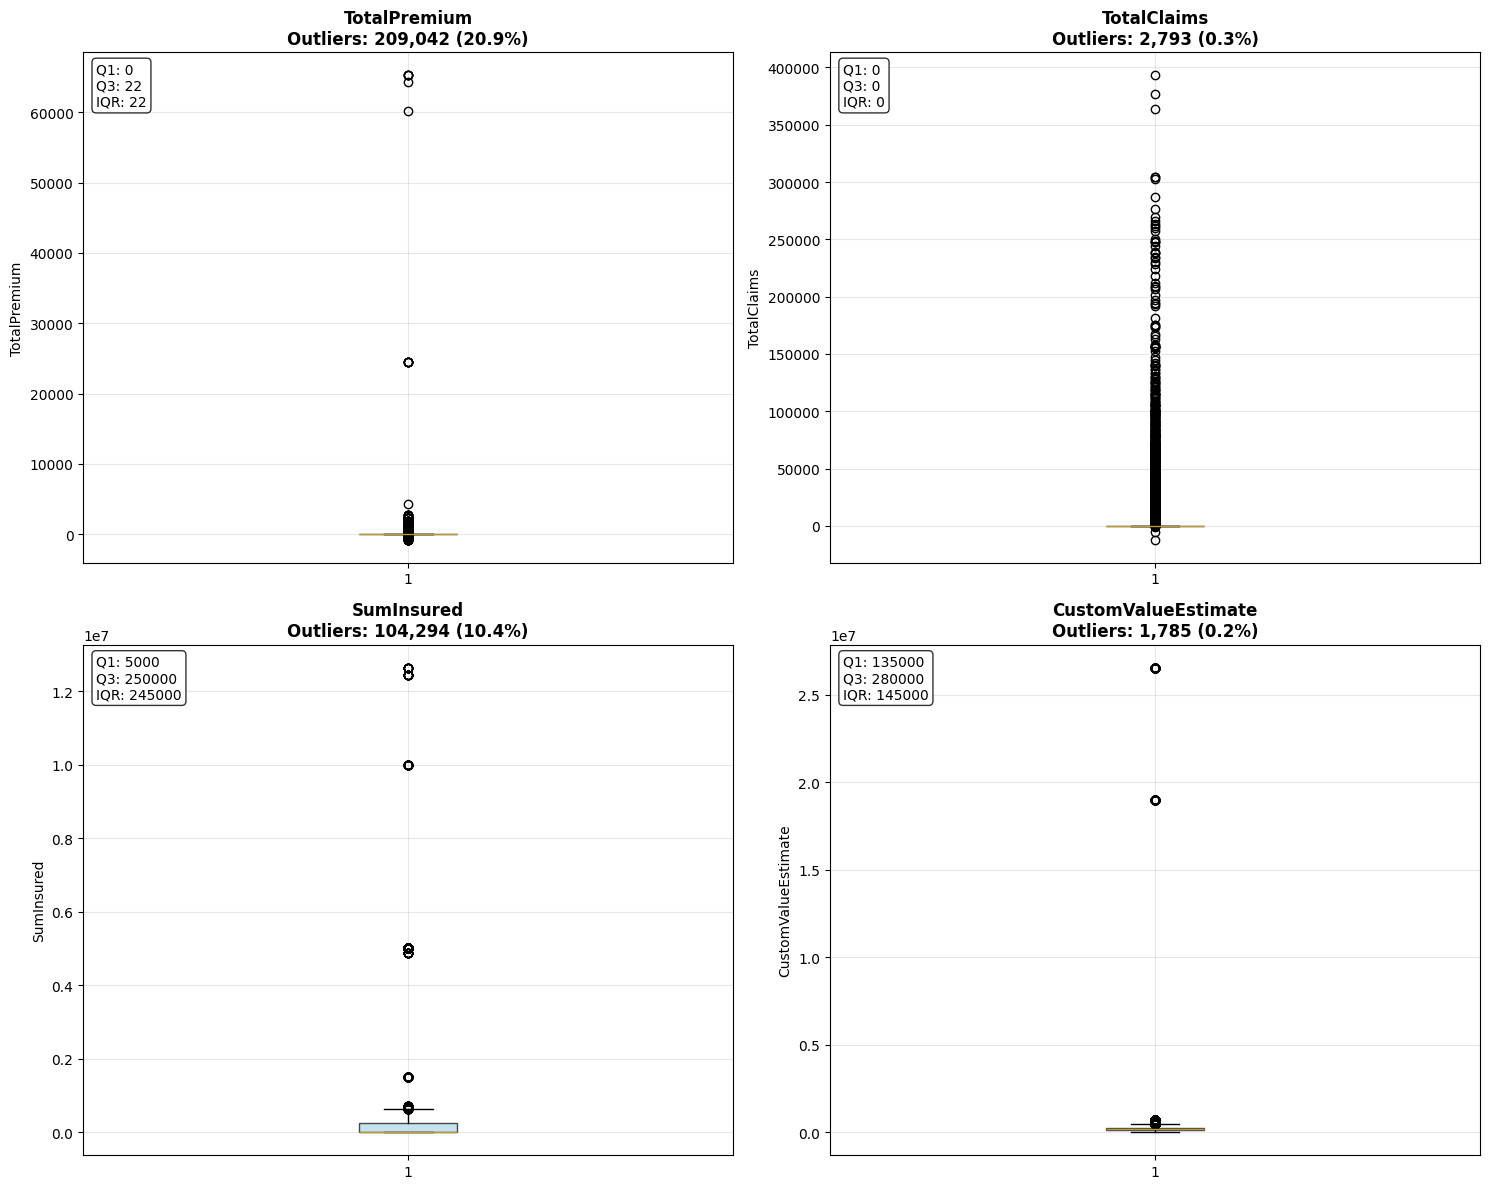

In [15]:
def detect_outliers(df, columns):
    """Detect outliers in key numerical columns using IQR method"""
    
    available_columns = [col for col in columns if col in df.columns]
    if not available_columns:
        print("No specified columns available for outlier detection")
        return {}
    
    n_cols = 2
    n_rows = (len(available_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.ravel()
    
    outlier_summary = {}
    
    for i, col in enumerate(available_columns):
        if i < len(axes):
            # Calculate IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_summary[col] = {
                'count': len(outliers),
                'percentage': (len(outliers) / len(df)) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'Q1': Q1,
                'Q3': Q3
            }
            
            # Box plot
            box_plot = axes[i].boxplot(df[col].dropna(), patch_artist=True)
            box_plot['boxes'][0].set_facecolor('lightblue')
            box_plot['boxes'][0].set_alpha(0.7)
            
            axes[i].set_title(f'{col}\nOutliers: {len(outliers):,} ({(len(outliers)/len(df)*100):.1f}%)', 
                            fontsize=12, fontweight='bold')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
            
            # Add statistics as text
            stats_text = f"Q1: {Q1:.0f}\nQ3: {Q3:.0f}\nIQR: {IQR:.0f}"
            axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Remove empty subplots
    for i in range(len(available_columns), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    return outlier_summary

# Detect outliers in key columns
key_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate']
print("Outlier Detection Analysis:")
outlier_results = detect_outliers(df, key_columns)

In [16]:
# Display outlier summary table
if outlier_results:
    outlier_df = pd.DataFrame(outlier_results).T
    outlier_df = outlier_df.round(2)
    outlier_df = outlier_df.sort_values('percentage', ascending=False)
    
    print("\nOutlier Summary Table:")
    display(outlier_df)
    
    print("\nKey Observations:")
    for col, stats in outlier_results.items():
        print(f"- {col}: {stats['count']:,} outliers ({stats['percentage']:.1f}% of data)")
        print(f"  Valid range: ${stats['lower_bound']:.0f} - ${stats['upper_bound']:.0f}")


Outlier Summary Table:


,count,percentage,lower_bound,upper_bound,Q1,Q3
TotalPremium,209042.0,20.90,-32.89,54.82,0.0,21.93
SumInsured,104294.0,10.43,-362500.00,617500.00,5000.0,250000.00
TotalClaims,2793.0,0.28,0.00,0.00,0.0,0.00
CustomValueEstimate,1785.0,0.18,-82500.00,497500.00,135000.0,280000.00



Key Observations:
- TotalPremium: 209,042 outliers (20.9% of data)
  Valid range: $-33 - $55
- TotalClaims: 2,793 outliers (0.3% of data)
  Valid range: $0 - $0
- SumInsured: 104,294 outliers (10.4% of data)
  Valid range: $-362500 - $617500
- CustomValueEstimate: 1,785 outliers (0.2% of data)
  Valid range: $-82500 - $497500


## 8. Key Findings and Insights {#findings}

Based on our comprehensive EDA analysis, let's summarize the key findings and business insights.

In [17]:
# Generate summary insights
print("=" * 60)
print("EXECUTIVE SUMMARY - KEY FINDINGS")
print("=" * 60)

print("\n1. DATASET OVERVIEW:")
print(f"   • Total records: {len(df):,}")
print(f"   • Total features: {len(df.columns)}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

if 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    total_premium = df['TotalPremium'].sum()
    total_claims = df['TotalClaims'].sum()
    overall_loss_ratio = total_claims / total_premium
    
    print("\n2. FINANCIAL PERFORMANCE:")
    print(f"   • Total Premium Revenue: ${total_premium:,.0f}")
    print(f"   • Total Claims Payout: ${total_claims:,.0f}")
    print(f"   • Overall Loss Ratio: {overall_loss_ratio:.3f}")
    print(f"   • Profitability Status: {'PROFITABLE' if overall_loss_ratio < 1.0 else 'LOSS-MAKING'}")

if outlier_results:
    print("\n3. DATA QUALITY INSIGHTS:")
    total_outliers = sum([stats['count'] for stats in outlier_results.values()])
    print(f"   • Total outliers detected: {total_outliers:,}")
    print(f"   • Highest outlier percentage: {max([stats['percentage'] for stats in outlier_results.values()]):.1f}%")

missing_data = df.isnull().sum().sum()
if missing_data > 0:
    print(f"   • Missing values: {missing_data:,} ({(missing_data/(len(df)*len(df.columns)))*100:.1f}% of total data)")
else:
    print("   • Data completeness: 100% (no missing values)")

print("\n4. RECOMMENDATIONS:")
print("   • Monitor high-risk segments identified in loss ratio analysis")
print("   • Investigate outliers for potential data quality issues")
print("   • Consider premium adjustments for loss-making segments")
print("   • Implement regular monitoring of key performance indicators")

print("\n" + "=" * 60)
print("EDA ANALYSIS COMPLETE")
print("=" * 60)

EXECUTIVE SUMMARY - KEY FINDINGS

1. DATASET OVERVIEW:
   • Total records: 1,000,098
   • Total features: 53
   • Memory usage: 2061.0 MB

2. FINANCIAL PERFORMANCE:
   • Total Premium Revenue: $61,911,563
   • Total Claims Payout: $64,867,546
   • Overall Loss Ratio: 1.048
   • Profitability Status: LOSS-MAKING

3. DATA QUALITY INSIGHTS:
   • Total outliers detected: 317,914
   • Highest outlier percentage: 20.9%
   • Missing values: 5,449,282 (10.3% of total data)

4. RECOMMENDATIONS:
   • Monitor high-risk segments identified in loss ratio analysis
   • Investigate outliers for potential data quality issues
   • Consider premium adjustments for loss-making segments
   • Implement regular monitoring of key performance indicators

EDA ANALYSIS COMPLETE


## Conclusion

This comprehensive EDA has provided valuable insights into the insurance dataset, including:

- **Data Quality Assessment**: Identified missing values, outliers, and data distribution patterns
- **Financial Performance**: Analyzed overall profitability through loss ratios and premium/claims relationships
- **Risk Segmentation**: Identified high and low-risk segments across different business dimensions
- **Temporal Trends**: Understanding of business performance over time
- **Correlation Analysis**: Key relationships between variables

These insights can inform strategic decisions around pricing, risk assessment, and portfolio management.

---

*Next steps: Based on these findings, proceed with hypothesis testing and statistical modeling to validate insights and build predictive models.*